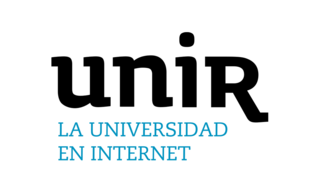
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Técnicas de agrupamiento

## Objetivos

- Entender los métodos de clustering K-means, jerárquico y DBSCAN.
- Generar agrupamientos con los métodos de clustering previamente indicados y realizar una comparativa.
- Investigar sobre una técnica de agrupamiento con un caso de uso concreto.


## Descripción de la actividad

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este conjunto de datos contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

### Tareas a realizar
- Clustering
  - Debes completar el código pedido en este notebook y contestar las preguntas finales.
  - Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de técnicas de agrupamiento. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para cada artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección de anomalías.
    - Técnicas de detección de anomalías empleadas.
    - Principales resultados de la aplicación y de la investigación.


#### Nombre del estudiante

Marcos Caballero Cortés

### Imports

In [2]:
!pip install plotly



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

### Clustering

Comenzamos importando las librerías necesarias y cargando el dataset.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, contiene una etiqueta de si tiene fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [5]:
# se carga el dataset, con separados 
df = pd.read_csv('data.csv', sep=';') 

#### ¿Cuántas instancias tiene el dataset?

In [6]:
print(df.shape[0])

944


#### ¿Cuál es el tipo de datos predominante en el dataset?

In [7]:
# datatype de cada columna
print(df.dtypes)

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object


#### ¿Son variables continuas o categóricas?

In [8]:
# Mostrar los valores máximos y mínimos de cada variable
print("Valores máximos y mínimos de cada variable:")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Mínimo: {df[column].min()}")
    print(f"Máximo: {df[column].max()}")


Valores máximos y mínimos de cada variable:

footfall:
Mínimo: 0
Máximo: 7300

tempMode:
Mínimo: 0
Máximo: 7

AQ:
Mínimo: 1
Máximo: 7

USS:
Mínimo: 1
Máximo: 7

CS:
Mínimo: 1
Máximo: 7

VOC:
Mínimo: 0
Máximo: 6

RP:
Mínimo: 19
Máximo: 91

IP:
Mínimo: 1
Máximo: 7

Temperature:
Mínimo: 1
Máximo: 24

fail:
Mínimo: 0
Máximo: 1


**CONTINUAS**:

- Footfall: Representa un rango de personas u objetos pasando por una máquina. Es un avariable contínua. No representa clases ni estados.

- RP: Es una medida de posición rotacional o velocidad de giro. Aunque podríamos decir que en caso de ser una posición rotacional podría tener 360 clases o estados, no tiene sentido debido al gran rango que tiene, además, en el caso de ser la velocidad de giro podría llegar a girar de forma muy rápida y en tantos rangos de velocidad distintos que lo vamos a tratar como una varable continua.

- Temperature: Aunque el rango que vemos en el dataset es limitado, la medición de temperatura debe de tratarse como una variable continua, ya que representa un estado físico.

**Categóricas**:

- tempMode: Representa modos de temperatura predefinidos, como niveles de configuración. No es una medición continua; son categorías codificadas numéricamente.

- AQ, USS, CS, IP: Estas variables miden niveles mediante sensores, pero están discretizadas en niveles o escalas fijas. Es probable que cada número represente un intervalo o clase de nivel (por ejemplo: AQ 1 = "muy limpio", AQ 7 = "muy contaminado").

- VOC: Similar a las anteriores, son niveles discretos de compuestos orgánicos volátiles. No son mediciones continuas sino rangos codificados.

- fail: Es una variable binaria que representa clases: fallo o no fallo. Siempre es categórica, incluso si es numérica (ideal para clasificación).

#### ¿cuáles son los valores mínimo y máximo de la variable 'RP'?

In [9]:
print("Valor mínimo: ", df['RP'].min())
print("Valor máximo: ", df['RP'].max())

Valor mínimo:  19
Valor máximo:  91


#### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

In [10]:
#datos faltantes
print(df.isnull().sum())


footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


No tiene datos nulos, tampoco hay datos faltantes codificados de alguna forma como por ejemplo un numero negativo como se puede ver en algún dataset, ya que hemos visto los valores mínimos y máximos y son normales.

#### Elimine la variable fail

In [11]:
df = df.drop('fail', axis=1)

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

Primero quiero ver si hay filas duplicadas

In [12]:
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 1


In [13]:
filas_duplicadas = df[df.duplicated()]
print("Filas duplicadas:")
print(filas_duplicadas)

# Eliminar las filas duplicadas
df = df.drop_duplicates()

Filas duplicadas:
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature
766        31         5   3    3   6    1  48   6           21


Después quiero ver la distribución de las variables para detectar outliers y borrarlos

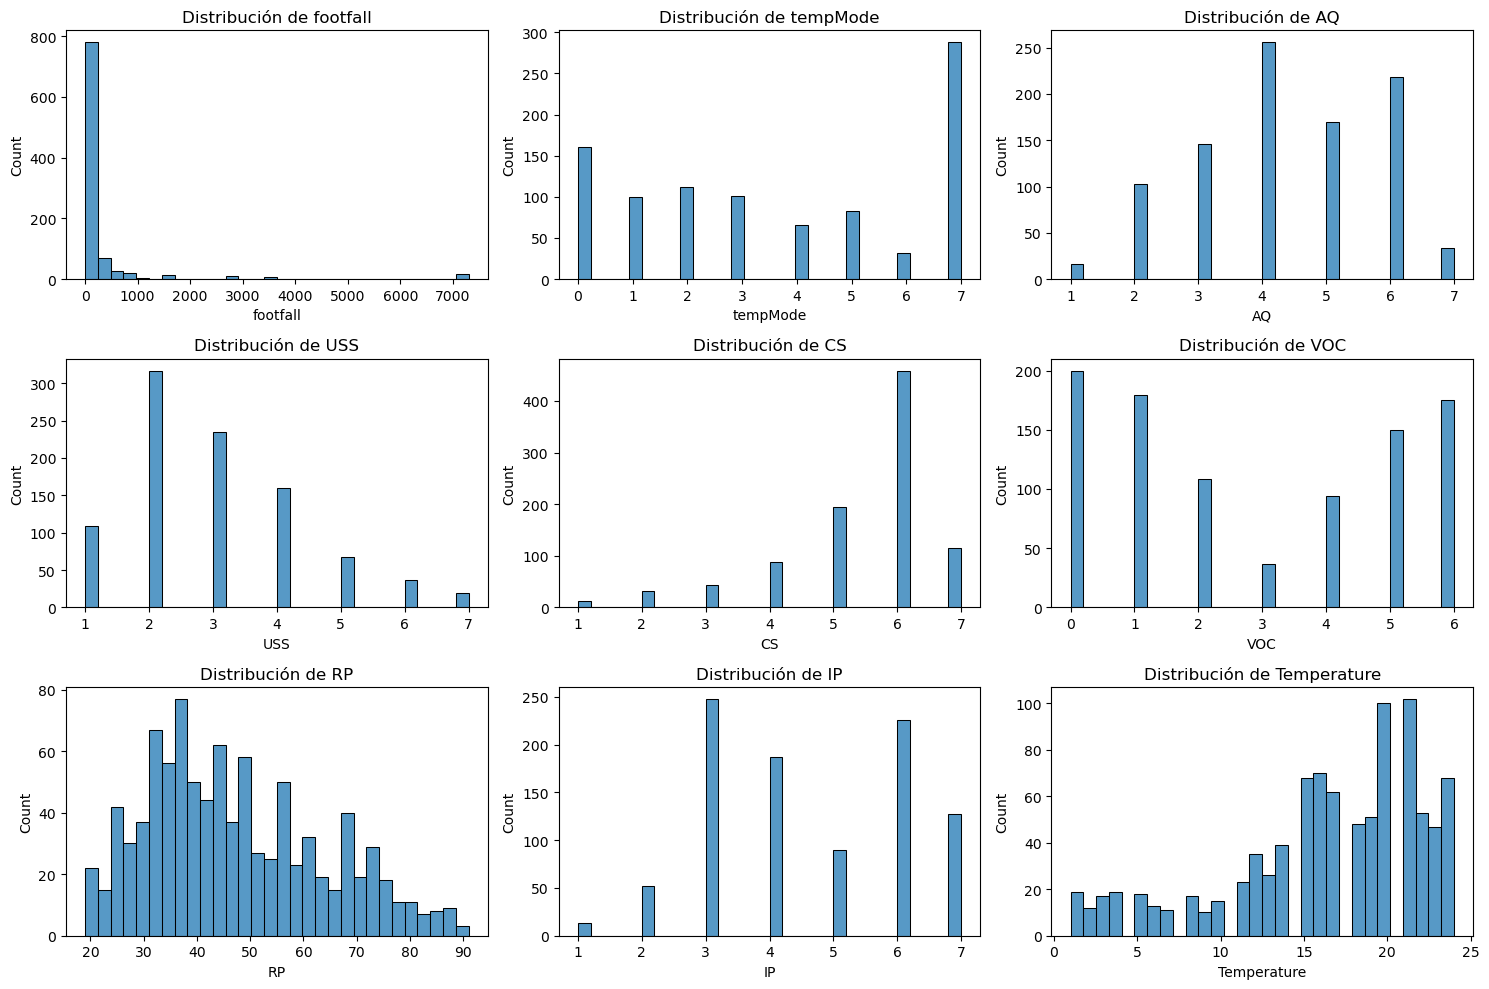

In [14]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=30)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

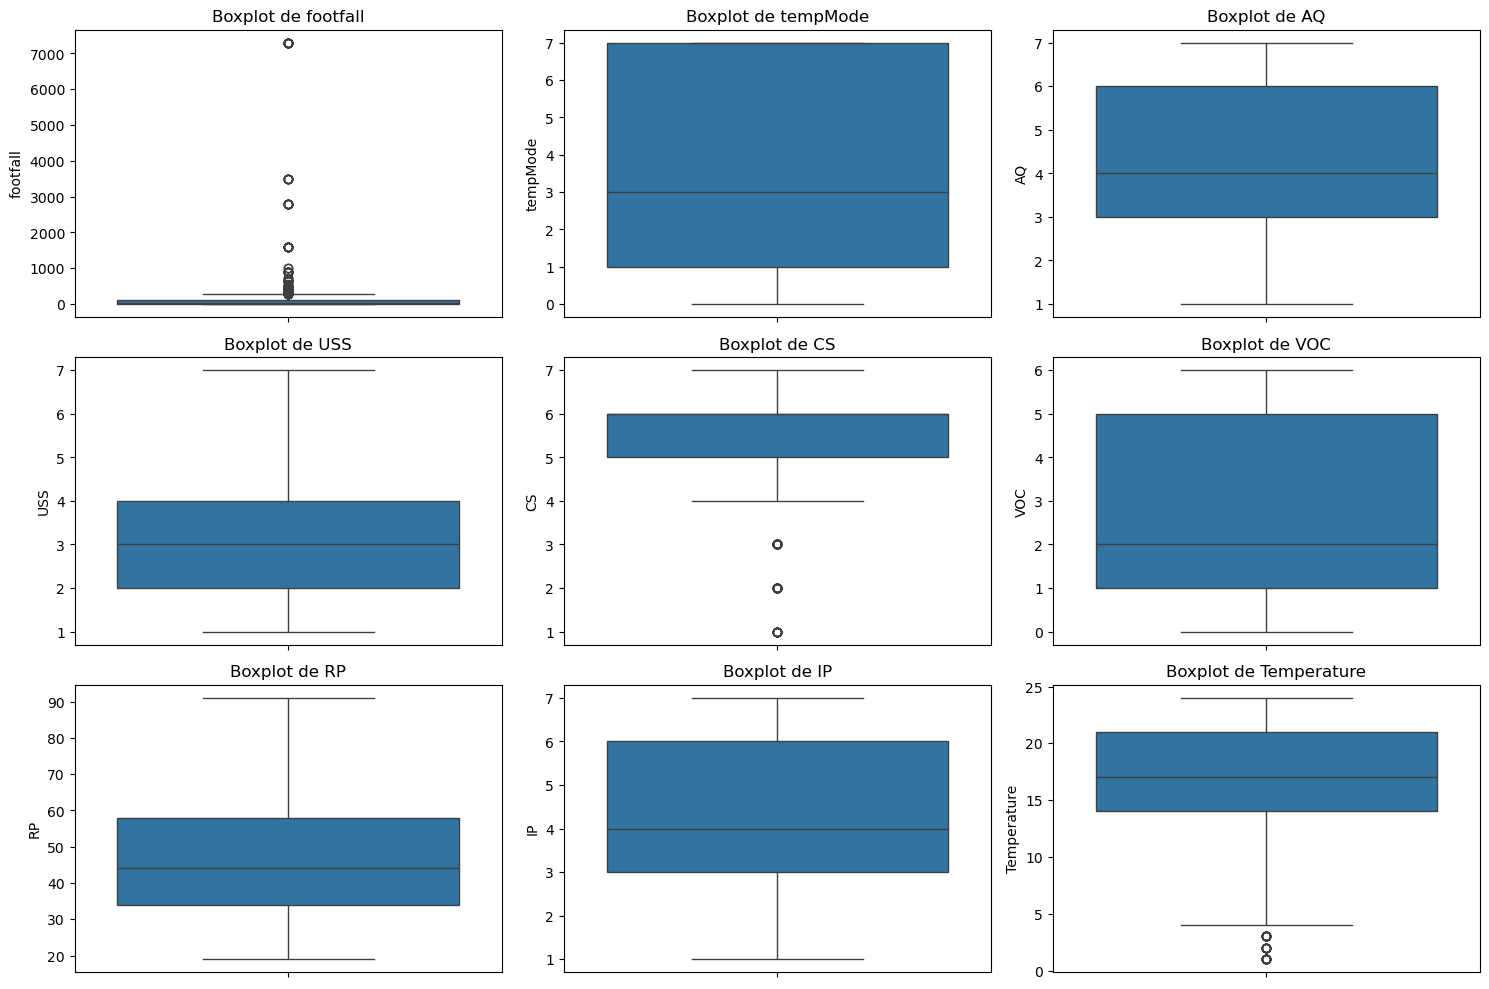

In [15]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [16]:
def remove_outliers(df):
    df_clean = df.copy()
    for column in df.columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Definir límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Contar outliers antes de eliminarlos
        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
        print(f"\nOutliers en {column}:")
        print(f"Límite inferior: {lower_bound:.2f}")
        print(f"Límite superior: {upper_bound:.2f}")
        print(f"Número de outliers: {len(outliers)}")
        
        # Eliminar outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    # Resetear los índices después de eliminar outliers
    df_clean = df_clean.reset_index(drop=True)
    return df_clean



In [17]:
df_clean = remove_outliers(df)

# Mostrar el número de filas antes y después de eliminar outliers
print(f"\nNúmero de filas antes de eliminar outliers: {len(df)}")
print(f"Número de filas después de eliminar outliers: {len(df_clean)}")


Outliers en footfall:
Límite inferior: -162.50
Límite superior: 273.50
Número de outliers: 154

Outliers en tempMode:
Límite inferior: -8.00
Límite superior: 16.00
Número de outliers: 0

Outliers en AQ:
Límite inferior: -1.50
Límite superior: 10.50
Número de outliers: 0

Outliers en USS:
Límite inferior: -1.00
Límite superior: 7.00
Número de outliers: 0

Outliers en CS:
Límite inferior: 3.50
Límite superior: 7.50
Número de outliers: 73

Outliers en VOC:
Límite inferior: -5.00
Límite superior: 11.00
Número de outliers: 0

Outliers en RP:
Límite inferior: -1.00
Límite superior: 95.00
Número de outliers: 0

Outliers en IP:
Límite inferior: -1.50
Límite superior: 10.50
Número de outliers: 0

Outliers en Temperature:
Límite inferior: 3.50
Límite superior: 31.50
Número de outliers: 31

Número de filas antes de eliminar outliers: 943
Número de filas después de eliminar outliers: 685


Tras hacer una eliminacion de los outliers con el método IQR deberemso de realizar una normalización para que variables con rangos muy altos como footfall no dominen el calculo de distancias en los diferentes algoritmos.

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(df_clean)

## K-Means

Crea 10 modelos de KMeans y entrénalos. Haciendo uso del método indicado para saber el número ideal de clústeres.

In [19]:
inertias = []
models = []
silhouette_scores = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Calcular métricas
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, kmeans.labels_)
    
    # Guardar resultados
    models.append(kmeans)
    inertias.append(inertia)
    silhouette_scores.append(silhouette)

c:\Users\Usuario\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Usuario\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Usuario\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, t

In [20]:
print(inertias)
print(silhouette_scores)

[5070.139381424823, 4468.32956593779, 4147.096527035083, 3848.479708354713, 3670.5081004550134, 3542.4695790651713, 3284.4384701708045, 3141.860542399262, 3079.4934541135863, 2977.2396880166043]
[0.1753428028474355, 0.17792739695255805, 0.18184854200315229, 0.15841016288348717, 0.13865000146111506, 0.12013673731549619, 0.12346503232992591, 0.12937180775449278, 0.13258442967838382, 0.13489266074365]


Ahora toca interpretar lo que Kmeans ha realizado. Recordemos que el objetivo de KMeans es encontrar patrones en los datos.

Lo primero que vamos a realizar es un gráfico para visualizar los clústers que ha creado con base en las variables utilizadas para crearlos.

Text(0.5, 1.0, 'Método de Silueta')

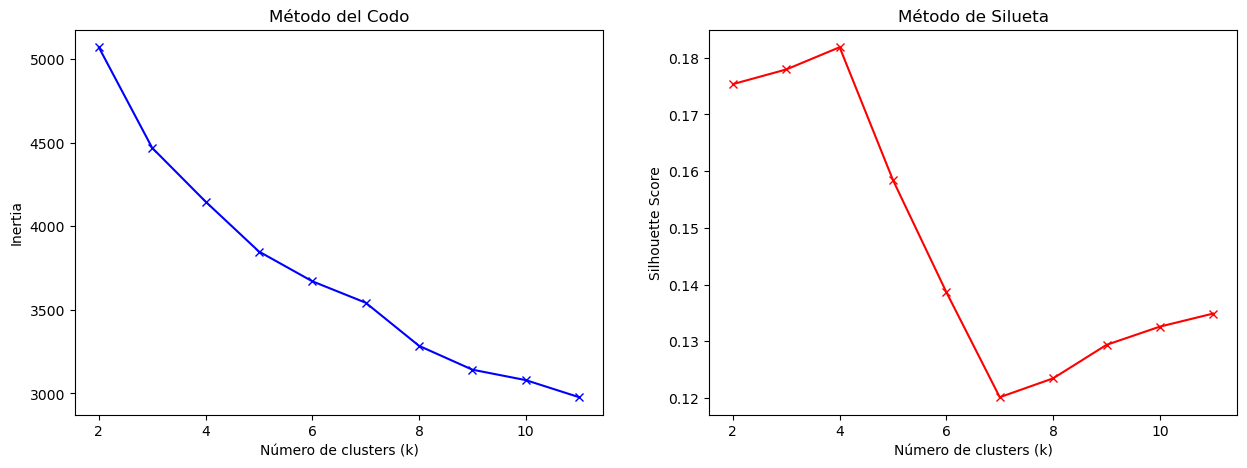

In [21]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 12), inertias, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(range(2, 12), silhouette_scores, 'rx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Método de Silueta')


Según el coeficiente de silueta el mejor número de clusters es 4.

La inercia (4147.10) ha descendido significativamente desde k = 3, pero a partir de k = 4, las mejoras en inercia son mucho más pequeñas.

Aumentar k más allá de 4 reduce marginalmente la inercia, pero a costa de una caída fuerte en cohesión interna (silueta).

In [22]:
k = 4
model = KMeans(n_clusters=k, random_state=42, n_init=10)
model.fit(X)

clusters = pd.DataFrame(df_clean, columns=df_clean.columns)  # Datos sin escalar para interpretación
clusters['label'] = model.labels_

polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"], var_name="variable", value_name="value")

fig = px.line_polar(polar,
                    r="value",
                    theta="variable",
                    color="label",
                    line_close=True,
                    title=f"Gráfico de Radar para K = {k}",
                    height=800,
                    width=600)
fig.show()

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Como con esta representacion no se ve muy bien los diferentes clusters he decidido probar a hacer PCA con dos componentes para poder ver los resultados en 2D. Esto se hace si los datasets tienen muchas variables, en este caso reducimos la dimensionalidad a dos componentes principales los cuales capturan la mayor varianza posible.

In [23]:
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_model.fit(X)

# Asignar etiquetas de clúster al DataFrame original
clusters_df = df_clean.copy()
clusters_df['label'] = kmeans_model.labels_

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



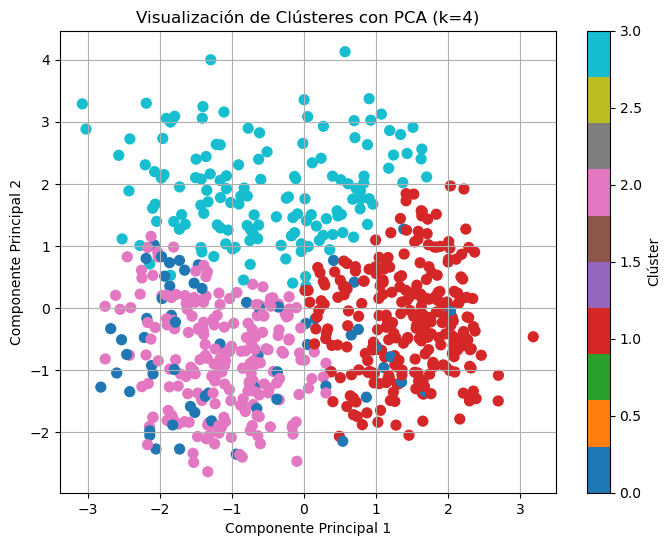

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_df['label'], cmap='tab10', s=50)
plt.title("Visualización de Clústeres con PCA (k=4)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label="Clúster")
plt.grid(True)
plt.show()


Como podemos ver hay una clara separacion en tres clusters, aunque los clústers rosa y azul oscuro parecen solaparse más entre sí. Esto puede deberse a que estamos viendo una separacion en 2D siendo un Dataset de muchas más dimensiones, por lo que no tinen por que solaparse tanto en realidad.

## DBSCAN

In [59]:
#### Realiza una búsqueda de los mejores hiperparámetros para el algoritmo

eps_values = np.arange(0.1, 2.0, 0.25)
min_samples_values = range(2, 10)

best_eps = None
best_min_samples = None
best_silhouette = -1

# Búsqueda de hiperparámetros
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Ignorar configuraciones donde todos los puntos son ruido
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

print(f"Mejores hiperparámetros: eps={best_eps}, min_samples={best_min_samples}, silhouette_score={best_silhouette:.4f}")

Mejores hiperparámetros: eps=1.8499999999999999, min_samples=4, silhouette_score=0.1525


In [67]:
#### Entrenar el algoritmo DBSCAN con los hiperparámetros encontrados

dbscan = DBSCAN(eps=1.85, min_samples=4) 
labels = dbscan.fit_predict(X)


df_clean['dbscan_cluster'] = labels


print("Distribución de clusters encontrados:")
print(df_clean['dbscan_cluster'].value_counts())


Distribución de clusters encontrados:
dbscan_cluster
 0    564
-1    121
Name: count, dtype: int64


Como podemos ver se han encontrado dos clusters. El primero muy denso con 564 puntos y el segundo con un 121 (casi un 18% del total)

In [75]:
#### Elegir dos variables para visualizar los clústeres

No he podido organizarme mejor y no he conseguido terminar la actividad.

## Dendrograma 

In [28]:
#### Aplica el algoritmo de AgglomerativeClustering a los datos

In [29]:
## Pon aquí tu código

In [30]:
#### Realiza un análisis de cuál es el número ideal de clústeres y explique el porqué de su elección

Indica tu respuesta

In [31]:
#### Aplica de nuevo el clustering jerárquico con el número de clústeres elegido y crea un dataframe con los datos y las etiquetas otorgadas por el algoritmo.

## Análisis

#### Realiza un análisis detallado de cada uno de los grupos generados por los algoritmos aplicados anteriormente y decide cuál es el mejor método para el conjunto de datos. 
Utiliza gráficos o tablas para apoyar tus conclusiones

## Artículos de investigación

### Artículo 1: "Detecting Clusters of Anomalies on Low-Dimensional Feature Subsets with Application to Network Traffic Flow Data"[arXiv](https://arxiv.org/abs/1511.01047)

* **Objetivo**: Este estudio aborda la detección de grupos de anomalías en datos de tráfico de red, como flujos de BotNet y peer-to-peer. El desafío radica en identificar subconjuntos de datos que, aunque individualmente puedan parecer normales, presentan comportamientos atípicos cuando se consideran conjuntamente en subconjuntos de características de baja dimensión. 

* **Técnicas de detección de anomalías empleadas**: Se desarrolló un esquema de detección de anomalías grupales (GAD) que identifica subconjuntos de muestras y características que, conjuntamente, especifican un clúster anómalo. A diferencia de estudios previos, este enfoque captura y explota las dependencias estadísticas entre las características medidas, en lugar de asumir independencia entre ellas.

* **Principales resultados**: La aplicación del método propuesto a datos reales de tráfico de red demostró su eficacia en la detección de intrusiones, superando a enfoques anteriores que asumían independencia entre características. Los resultados resaltan la importancia de considerar las dependencias entre características para mejorar la detección de anomalías en datos de red.

### Artículo 2: "Anomaly detection in automotive industry using clustering methods—a case study" [Google Scholar](https://www.mdpi.com/2076-3417/11/21/9868)

* **Objetivo**: Este estudio se centra en la detección de anomalías en la industria automotriz, específicamente en la identificación de comportamientos atípicos en datos de sensores de vehículos. El objetivo es mejorar la calidad y confiabilidad de los vehículos mediante la detección temprana de fallos o comportamientos inusuales.

* **Técnicas de detección de anomalías empleadas**: Se aplicaron métodos de clustering, como K-means y DBSCAN, para agrupar datos de sensores y detectar patrones inusuales que podrían indicar anomalías. Estas técnicas permiten identificar grupos de datos que se desvían del comportamiento normal esperado.

* **Principales resultados**: La implementación de estas técnicas de clustering permitió detectar eficazmente anomalías en los datos de sensores de vehículos, facilitando la identificación temprana de posibles fallos. Los resultados sugieren que el uso de métodos de agrupamiento puede ser una herramienta valiosa para mejorar la detección de anomalías en la industria automotriz.
